# Relative strength index (RSI) for Stocks
# 

# Importing Important Library

In [1]:
import pandas_datareader as pdr
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Importing DataSet from Yahoo Finance

In [2]:
company='SBIN.NS'
start=dt.datetime(2021, 5, 1)
end=dt.datetime.now()
df = pdr.get_data_yahoo(company, start, end)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-05-03,352.500000,341.399994,349.600006,350.600006,43691860.0,347.392700
2021-05-04,362.899994,350.200012,355.000000,351.500000,57749307.0,348.284454
2021-05-05,357.450012,348.000000,356.500000,355.399994,40872501.0,352.148773
2021-05-06,359.350006,350.549988,358.000000,355.549988,36294427.0,352.297394
2021-05-07,362.000000,353.000000,357.500000,358.250000,38357618.0,354.972717
...,...,...,...,...,...,...
2021-11-16,507.399994,493.500000,507.399994,495.100006,19553216.0,495.100006
2021-11-17,505.399994,491.000000,493.850006,498.149994,20488483.0,498.149994
2021-11-18,506.200012,492.299988,499.100006,503.799988,22471070.0,503.799988


# Calculating Difference between two consecutive Close Price 

In [3]:
delta=df['Close'].diff(1)
delta.dropna(inplace=True)
df['delta']=delta
df

,High,Low,Open,Close,Volume,Adj Close,delta
Date,,,,,,,
2021-05-03,352.500000,341.399994,349.600006,350.600006,43691860.0,347.392700,NaN
2021-05-04,362.899994,350.200012,355.000000,351.500000,57749307.0,348.284454,0.899994
2021-05-05,357.450012,348.000000,356.500000,355.399994,40872501.0,352.148773,3.899994
2021-05-06,359.350006,350.549988,358.000000,355.549988,36294427.0,352.297394,0.149994
2021-05-07,362.000000,353.000000,357.500000,358.250000,38357618.0,354.972717,2.700012
...,...,...,...,...,...,...,...
2021-11-16,507.399994,493.500000,507.399994,495.100006,19553216.0,495.100006,-11.449982
2021-11-17,505.399994,491.000000,493.850006,498.149994,20488483.0,498.149994,3.049988
2021-11-18,506.200012,492.299988,499.100006,503.799988,22471070.0,503.799988,5.649994


# Code for RSI

In [4]:
positive=delta.copy()
negative=delta.copy()
positive[positive<0]=0
negative[negative>0]=0
days=14
average_gain=positive.rolling(window=days).mean()
average_loss=abs(negative.rolling(window=days).mean())
relative_stength=average_gain/average_loss
RSI=100.0-(100.0/(1.0+relative_stength))

In [5]:
combined=pd.DataFrame()
combined['Close']=df['Close']
combined['RSI']=RSI

# Plotting the curve

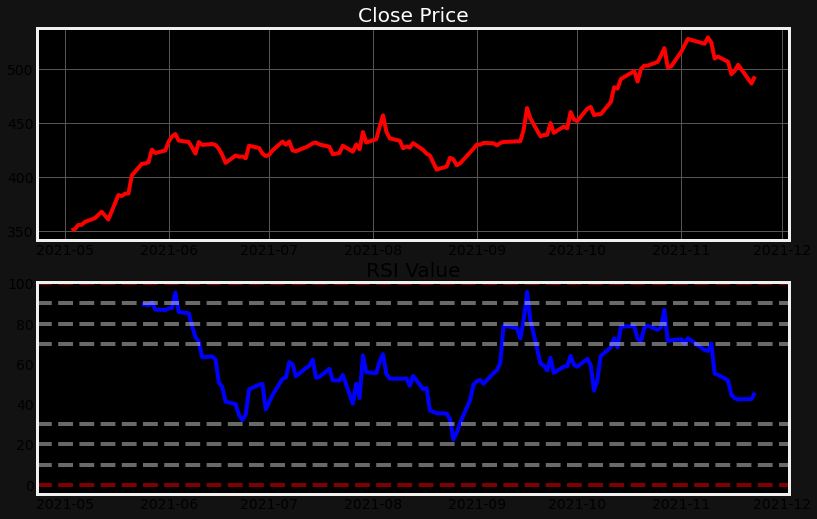

In [6]:
plt.figure(figsize=(12,8))
ax1=plt.subplot(211)
ax1.plot(combined.index, combined['Close'], color='red')
ax1.set_title('Close Price', color='white')
ax1.grid(True, color='#5555')
ax1.set_axisbelow(True)
ax1.set_facecolor('black')
ax1.figure.set_facecolor('#121212')
ax1.tick_params(axis='x', color='white')
ax1.tick_params(axis='y', color='white')
ax2=plt.subplot(212, sharex=ax1)
ax2.plot(combined.index, combined['RSI'], color='blue')
ax2.axhline(0,linestyle='--', alpha=.5, color='red')
ax2.axhline(10,linestyle='--', alpha=.5, color='lightgray')
ax2.axhline(20,linestyle='--', alpha=.5, color='#cccc')
ax2.axhline(30,linestyle='--', alpha=.5, color='lightgray')
ax2.axhline(70,linestyle='--', alpha=.5, color='lightgray')
ax2.axhline(80,linestyle='--', alpha=.5, color='lightgray')
ax2.axhline(90,linestyle='--', alpha=.5, color='lightgray')
ax2.axhline(100,linestyle='--', alpha=.5, color='red')
ax2.set_title("RSI Value")
ax2.grid(False)
ax2.set_axisbelow(True)
ax2.set_facecolor('black')
ax2.tick_params(axis='x', color='white')
ax2.tick_params(axis='y', color='white')
plt.show()